# Data Load

In [1]:
# warning 표시 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
#gapminder dataset 라이브러리를 설치

!pip install gapminder

In [3]:
#gapminder를 import하고 출력

from gapminder import gapminder

gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


# Regression

**주어진 데이터를 활용하여 대륙명, 연도, 기대수명, 인구가 주어졌을 때 1인당 GDP를 예측하는 모델을 만드려고 한다.**

1. 주어진 빈칸에 알맞은 값을 입력하여 country 열을 뺀 새로운 데이터를 gapminder 변수에 할당 하시오.
아래와 같이 gapminder 데이터가 출력될 수 있게 하시오. (10점)

In [4]:
gapminder = gapminder.iloc[:, gapminder.columns != "country"]

In [5]:
gapminder

,continent,year,lifeExp,pop,gdpPercap
0,Asia,1952,28.801,8425333,779.445314
1,Asia,1957,30.332,9240934,820.853030
2,Asia,1962,31.997,10267083,853.100710
3,Asia,1967,34.020,11537966,836.197138
4,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...
1699,Africa,1987,62.351,9216418,706.157306
1700,Africa,1992,60.377,10704340,693.420786
1701,Africa,1997,46.809,11404948,792.449960
1702,Africa,2002,39.989,11926563,672.038623


2. 주어진 빈칸에 알맞은 값을 입력하여 continent 열을 one-hot encoding한 데이터를 encoded_data 변수에 할당하시오. 아래와 같이 encoded_data가 출력될 수 있게 하시오. (10점)

In [6]:
import pandas as pd

encoded_data = pd.get_dummies(gapminder, columns=["continent"])

In [7]:
encoded_data

,year,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,1952,28.801,8425333,779.445314,0,0,1,0,0
1,1957,30.332,9240934,820.853030,0,0,1,0,0
2,1962,31.997,10267083,853.100710,0,0,1,0,0
3,1967,34.020,11537966,836.197138,0,0,1,0,0
4,1972,36.088,13079460,739.981106,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1699,1987,62.351,9216418,706.157306,1,0,0,0,0
1700,1992,60.377,10704340,693.420786,1,0,0,0,0
1701,1997,46.809,11404948,792.449960,1,0,0,0,0
1702,2002,39.989,11926563,672.038623,1,0,0,0,0


3. 알맞은 코드를 입력하여 아래와 같이 2x2 subplot에 year, lifeExp, pop, gdpPercap에 대한 히스토그램을 그려서 출력하시오. (20점)

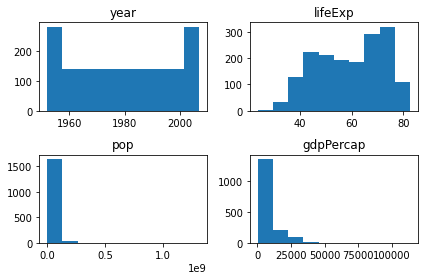

In [8]:
import matplotlib.pyplot as plt

###
plt.subplot(2,2,1)
plt.hist(gapminder['year'])
plt.title('year')

plt.subplot(2,2,2)
plt.hist(gapminder['lifeExp'])
plt.title('lifeExp')

plt.subplot(2,2,3)
plt.hist(gapminder['pop'])
plt.title('pop')

plt.subplot(2,2,4)
plt.hist(gapminder['gdpPercap'])
plt.title('gdpPercap')
###

plt.tight_layout()
plt.show()

4. pop과 gdpPercap 변수를 로그 변환을 하려 한다. 주어진 빈칸을 채워 넣어 알맞게 로그 변환 하시오. (10점)

In [9]:
import numpy as np

encoded_data['pop_log'] = np.log(encoded_data['pop'])
encoded_data['gdpPercap_log'] = np.log(encoded_data['gdpPercap'])

5. 주어진 빈칸을 알맞게 채워 넣어 pop_log, year, lifeExp, 원핫 인코딩된 대륙명 변수를 활용하여 gdpPercap_log를 예측하는 선형 회귀 모델을 만들고 MSE로 평가 하시오.이때, 다중 공선성 오류를 피하기 위해 원핫 인코딩된 변수는 continent_Oceania 변수를 제외하고 입력하시오. (20점)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 추출
X_df = encoded_data[['pop_log', 'year', 'lifeExp', 'continent_Africa', 'continent_Americas', 'continent_Asia', 'continent_Europe']]
y_df = encoded_data[['gdpPercap_log']]

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# 모델 로드
lin_reg = LinearRegression()

# 모델 학습
lin_reg.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"{lin_reg.__class__.__name__} MSE: {mse:.16f}") #mse를 출력하는 코드

LinearRegression MSE: 0.4168393847396486


6. 주어진 빈칸을 알맞게 채워 넣어 pop_log, year, lifeExp, 원핫 인코딩된 대륙명 변수를 활용하여 gdpPercap_log를 예측하는 GradientBoosting, XGBoost, LightGBM 회귀 모델을 만들고 MSE로 평가 하시오.이때, 다중 공선성 오류를 피하기 위해 원핫 인코딩된 변수는 continent_Oceania 변수를 제외하고 입력하시오. (30점)

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 모델 정의
gb_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()
lgb_reg = LGBMRegressor()

# 모델 학습
for model in [gb_reg, xgb_reg, lgb_reg]:
    model.fit(X_train, y_train)

# 예측 및 성능 평가
for model in [gb_reg, xgb_reg, lgb_reg]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}")

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 531
[LightGBM] [Info] Number of data points in the train set: 1363, number of used features: 7
[LightGBM] [Info] Start training from score 8.155438
GradientBoostingRegressor MSE: 0.34056680816395857
XGBRegressor MSE: 0.37222287198419934
LGBMRegressor MSE: 0.33232827916593727


# 보너스

1. 데이터 전처리 시간에 배운 것을 활용하여 데이터를 전처리하고, 전처리한 데이터를 가지고 LGBMRegressor()로 학습하시오. (시도 시 10점, 기존 모델에 비해 성능 향상 시 10점)

In [12]:
encoded_data = pd.get_dummies(gapminder, columns=['continent'])
encoded_data['pop_log'] = np.log(encoded_data['pop'])
encoded_data['gdpPercap_log'] = np.log(encoded_data['gdpPercap'])

X = encoded_data.drop(['gdpPercap_log', 'continent_Oceania'], axis=1)
y = encoded_data['gdpPercap_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_reg = LGBMRegressor()
lgb_reg.fit(X_train, y_train)

y_pred = lgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"LGBMRegressor MSE: {mse}")

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1041
[LightGBM] [Info] Number of data points in the train set: 1363, number of used features: 9
[LightGBM] [Info] Start training from score 8.155438
LGBMRegressor MSE: 0.0009648262182661781


2. 선형 회귀 모델을 이용하여 회귀분석을 진행하고, 그 의미에 대해서 직접 해석해보시오. (시도 시 10점)

In [13]:
import statsmodels.api as sm

encoded_data = pd.get_dummies(gapminder, columns=['continent'])

X_df = encoded_data.drop('gdpPercap',axis=1)
y_df = encoded_data['gdpPercap']

X_df = sm.add_constant(X_df)

lin_reg = sm.OLS(y_df, X_df)

result = lin_reg.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gdpPercap   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     141.4
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          2.66e-164
Time:                        01:19:09   Log-Likelihood:                -17696.
No. Observations:                1704   AIC:                         3.541e+04
Df Residuals:                    1696   BIC:                         3.545e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.292e+04   2.22e+04     -1.034      0.301   -6.64e+04    2.06e+04
year                   6.5271     13.939      0.468      0.640     -20.812      33.866
lifeExp              388.1655     26.037     14.908      0.000     337.097     439.234
pop                -6.416e-06   1.86e-06     -3.454      0.001   -1.01e-05   -2.77e-06
continent_Africa   -6707.6449   4688.123     -1.431      0.153   -1.59e+04    2487.469
continent_Americas -7802.1451   4450.063     -1.753      0.080   -1.65e+04     926.046
continent_Asia     -4915.8884   4509.084     -1.090      0.276   -1.38e+04    3928.066
continent_Europe   -3328.0795   4345.070     -0.766      0.444   -1.19e+04    5194.183
continent_Oceania   -169.5052   4494.343     -0.038      0.970   -8984.547    8645.536
==============================================================================
Omnibus:                     1996.307   Durbin-Watson:                   0.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           299082.688
Skew:                           5.848   Prob(JB):                         0.00
Kurtosis:                      66.841   Cond. No.                     3.79e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 해석을 적는 란

해석: import 및 데이터 로드와 전처리 부분은 위의 동일한 부분과 동일하여 생략하였다. X_df와 y_df로 데이터를 우선 추출 후 선형 회귀 모델을 이용하여 회귀분석을 진행하여야 하므로 회귀 모델에 상수를 추가하기 위하여 add_constant 함수를 사용하였다. sm.OLS 클래스를 이용하여 선형 회귀 모델을 정의한 후 fit을 이용하여 모델을 학습한 후 그 값을 result에 넣어 회귀 분석 결과를 나타내었다.